In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('Non_linear_SVM_Dataset.csv')
df.shape

(500, 3)

In [4]:
df.head()

,X1,X2,Y
0,0.830858,-0.334342,1.0
1,0.991710,0.879000,0.0
2,1.107245,-0.470344,1.0
3,-0.140899,1.033148,0.0
4,0.405592,1.328529,0.0


In [5]:
df.isnull().sum()

X1    0
X2    0
Y     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

<Axes: >

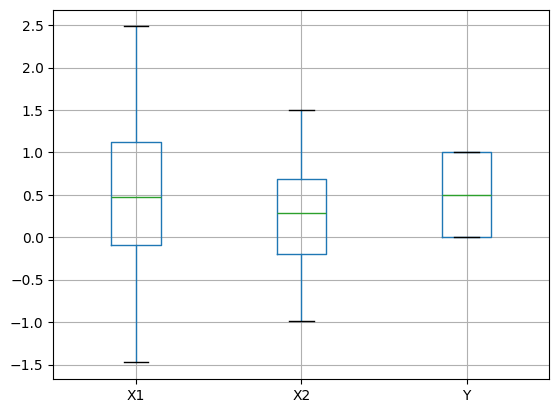

In [7]:
df.boxplot()

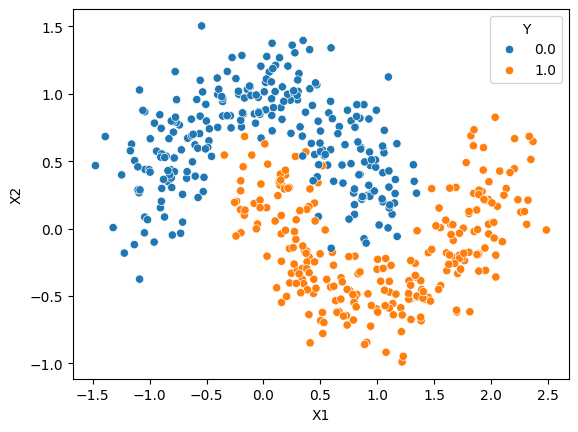

In [8]:
sns.scatterplot(x=df.X1,y=df.X2,hue=df.Y)
plt.show()

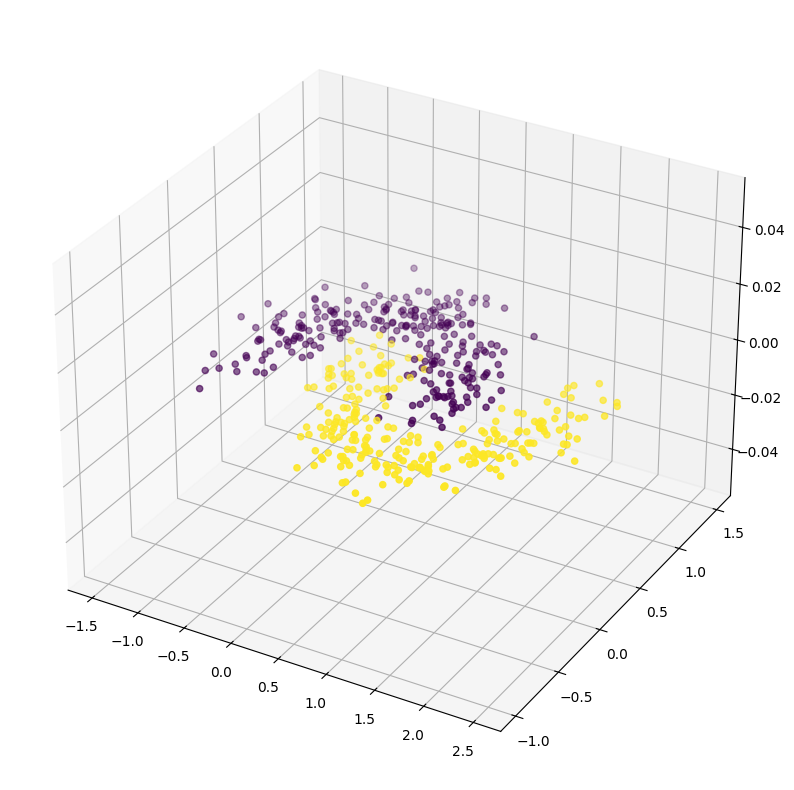

In [9]:
#3-D Plot with colors
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs=df.X1, ys=df.X2, c=df.Y, cmap='viridis')
plt.show()

In [10]:
features = df.drop(columns=['Y'])
target = df[['Y']]

In [11]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.8,random_state=100,stratify=df.Y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 2)
(100, 2)
(400, 1)
(100, 1)


In [12]:
#Linear Kernel
svc = SVC(C=1,kernel='linear')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.81

In [13]:
df.X1.min(),df.X1.max(),df.X2.min(),df.X2.max()

(np.float64(-1.4761269392401806),
 np.float64(2.48480165010424),
 np.float64(-0.9885260706545684),
 np.float64(1.504278803710552))

In [14]:
x_min = df.X1.min()-1
y_min = df.X2.min()-1
x_max = df.X1.max()+1
y_max = df.X2.max()+1
print(x_min,x_max,y_min,y_max)

-2.4761269392401806 3.48480165010424 -1.9885260706545684 2.5042788037105517


In [15]:
h=0.02
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
xx,yy

(array([[-2.47612694, -2.45612694, -2.43612694, ...,  3.44387306,
          3.46387306,  3.48387306],
        [-2.47612694, -2.45612694, -2.43612694, ...,  3.44387306,
          3.46387306,  3.48387306],
        [-2.47612694, -2.45612694, -2.43612694, ...,  3.44387306,
          3.46387306,  3.48387306],
        ...,
        [-2.47612694, -2.45612694, -2.43612694, ...,  3.44387306,
          3.46387306,  3.48387306],
        [-2.47612694, -2.45612694, -2.43612694, ...,  3.44387306,
          3.46387306,  3.48387306],
        [-2.47612694, -2.45612694, -2.43612694, ...,  3.44387306,
          3.46387306,  3.48387306]], shape=(225, 299)),
 array([[-1.98852607, -1.98852607, -1.98852607, ..., -1.98852607,
         -1.98852607, -1.98852607],
        [-1.96852607, -1.96852607, -1.96852607, ..., -1.96852607,
         -1.96852607, -1.96852607],
        [-1.94852607, -1.94852607, -1.94852607, ..., -1.94852607,
         -1.94852607, -1.94852607],
        ...,
        [ 2.45147393,  2.45147393,  

In [16]:
xx.ndim,yy.ndim

(2, 2)

In [17]:
data = np.c_[np.ravel(xx),np.ravel(yy)]
z=svc.predict(data)
data1=pd.DataFrame(data,columns=['xx','yy'])
data1['Z']=z
data1

,xx,yy,Z
0,-2.476127,-1.988526,1.0
1,-2.456127,-1.988526,1.0
2,-2.436127,-1.988526,1.0
3,-2.416127,-1.988526,1.0
4,-2.396127,-1.988526,1.0
...,...,...,...
67270,3.403873,2.491474,0.0
67271,3.423873,2.491474,0.0
67272,3.443873,2.491474,0.0
67273,3.463873,2.491474,0.0


In [18]:
z1=z.reshape(xx.shape)
z1.ndim

2

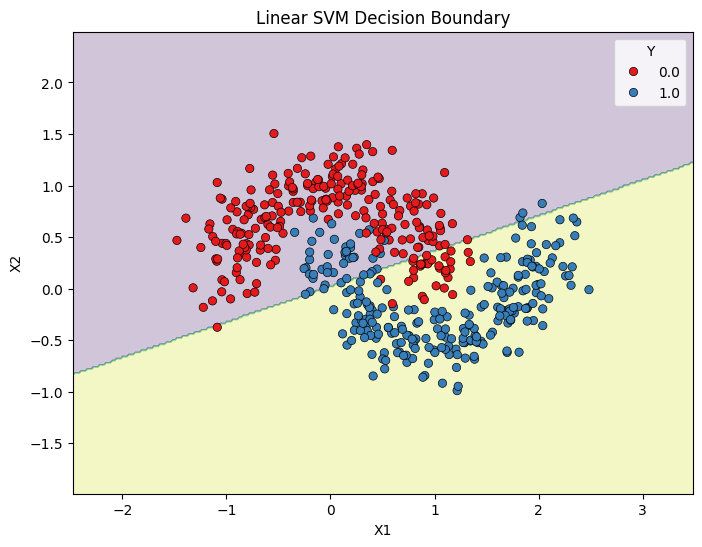

In [19]:
plt.figure(figsize=(8,6))

# Decision plane
plt.contourf(xx, yy,z1, alpha=0.25)

# Actual data points
sns.scatterplot(
    x=df.X1,
    y=df.X2,
    hue=df.Y,
    palette='Set1',
    edgecolor='k'
)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Linear SVM Decision Boundary")
plt.show()

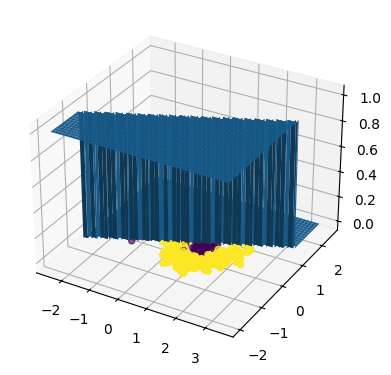

In [20]:
### 3-D Plot
fig= plt.figure(figsize=(10,10))
ax= fig.add_subplot(222,projection='3d')
ax.plot_surface(xx,yy,z1)
ax.scatter(df.X1,df.X2,c=df.Y)
plt.show()

In [21]:
#  Polynomial Kernel
svc = SVC(C=1,kernel='poly')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.89

In [22]:
z=svc.predict(data)
z1=z.reshape(xx.shape)
z1.ndim

2

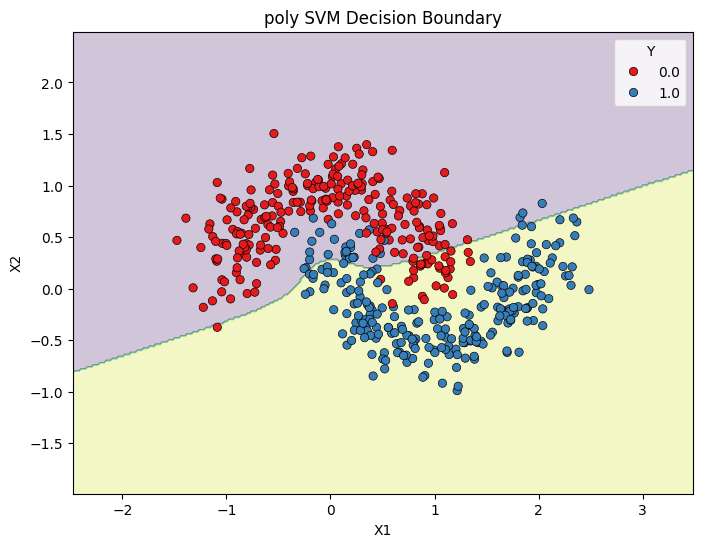

In [23]:
plt.figure(figsize=(8,6))

# Decision plane
plt.contourf(xx, yy,z1, alpha=0.25)

# Actual data points
sns.scatterplot(
    x=df.X1,
    y=df.X2,
    hue=df.Y,
    palette='Set1',
    edgecolor='k'
)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("poly SVM Decision Boundary")
plt.show()

In [24]:
#  rbf Kernel
svc = SVC(C=1,kernel='rbf')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.97

In [25]:
z=svc.predict(data)
z1=z.reshape(xx.shape)
z1.ndim

2

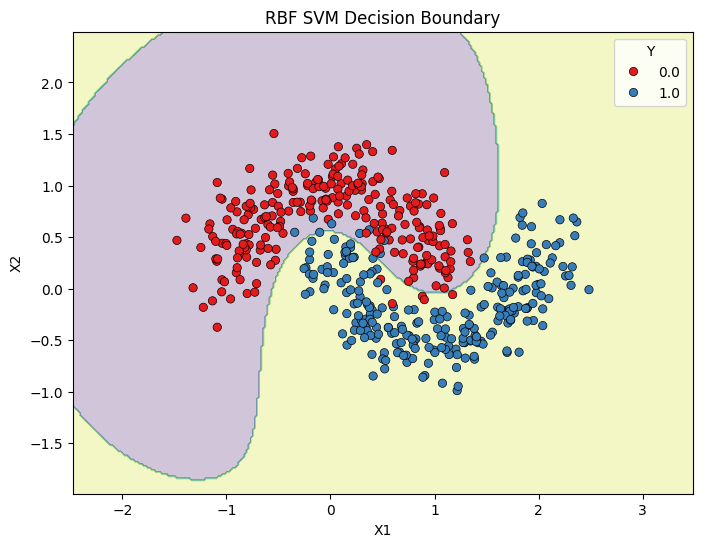

In [26]:
plt.figure(figsize=(8,6))

# Decision plane
plt.contourf(xx, yy,z1, alpha=0.25)

# Actual data points
sns.scatterplot(
    x=df.X1,
    y=df.X2,
    hue=df.Y,
    palette='Set1',
    edgecolor='k'
)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("RBF SVM Decision Boundary")
plt.show()

In [27]:
#  Sigmoid Kernel
svc = SVC(C=1,kernel='sigmoid',gamma=0.06)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.81

In [28]:
z=svc.predict(data)
z1=z.reshape(xx.shape)
z1.ndim

2

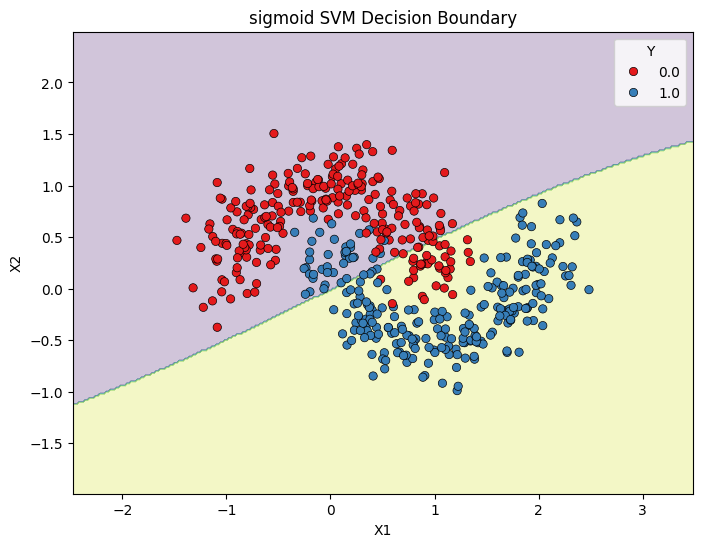

In [29]:
plt.figure(figsize=(8,6))

# Decision plane
plt.contourf(xx, yy,z1, alpha=0.25)

# Actual data points
sns.scatterplot(
    x=df.X1,
    y=df.X2,
    hue=df.Y,
    palette='Set1',
    edgecolor='k'
)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("sigmoid SVM Decision Boundary")
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV
params= {'kernel':['linear','poly','rbf','sigmoid'],'C':range(1,11)}

In [31]:
grid_search = GridSearchCV(estimator=svc,param_grid=params,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(C=1, gamma=0.06, kernel='sigmoid'),
             param_grid={'C': range(1, 11),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [32]:
grid_search.best_params_,grid_search.best_score_

({'C': 9, 'kernel': 'rbf'}, np.float64(0.865))